# ✅ Next Exercise: CIFAR-10 Image Classification (Optimized for Apple M1 Pro)

We will now train a CNN model on the CIFAR-10 dataset (which contains 60,000 images across 10 classes). 🚀

**🔥 Optimizations Applied**

- ✅ Enable Metal GPU & Mixed Precision (set_global_policy('mixed_float16')).
- ✅ Use @tf.function for Faster Execution.
- ✅ Use Efficient Data Preprocessing (Prefetching, Batching, Resizing).
- ✅ Use Larger Batch Size to Utilize GPU Fully.
- ✅ Use Data Augmentation to Improve Generalization.

## ✅ Step 1: Import Required Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # Importing the library for data visualization

# Print the installed TensorFlow version
print(tf.__version__)  

# Check and print whether a GPU is available for TensorFlow
print("GPU Available:", tf.config.list_physical_devices('GPU'))  


2.16.2
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## ✅ Step 2: Load and Preprocess CIFAR-10 Data

In [2]:
# Load CIFAR-10 dataset (60,000 32x32 color images in 10 classes)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0,1] range for better training stability
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Convert labels to categorical one-hot encoding (useful for categorical cross-entropy loss)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Create a TensorFlow dataset pipeline for efficient training
batch_size = 64  # Set batch size for mini-batch training

# Convert training data into a shuffled, batched dataset
# Shuffle dataset with a buffer size of 50,000
# Create mini-batches of size 64
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(50000).batch(batch_size) 

# Convert testing data into a batched dataset (no shuffling needed)
# Batch test data for efficient evaluation
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)


2025-03-15 20:22:30.888532: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-03-15 20:22:30.888713: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-15 20:22:30.888735: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-15 20:22:30.889010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-15 20:22:30.889029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## ✅ Step 3: Define CNN Model (Optimized for Metal GPU)

In [3]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Explicit Input layer for 32x32 RGB images

    # First convolutional block: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),  # Downsample with 2x2 max pooling

    # Second convolutional block: 64 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),  # Downsample with 2x2 max pooling

    # Third convolutional block: 128 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),  # Downsample with 2x2 max pooling

    # Fully connected layers
    layers.Flatten(),  # Flatten the feature maps into a 1D vector
    layers.Dense(128, activation='relu'),  # Dense layer with 128 neurons
    layers.Dense(10, activation='softmax')  # Output layer (10 classes with softmax activation)
])

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer for efficient learning
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)


## ✅ Step 4: Train the Model on Metal GPU

In [4]:
# Enable mixed precision for Apple GPUs (optional, improves performance on M1/M2 chips)
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')

# Check if a GPU is available and list all physical devices
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices())  # Prints available CPU/GPU/TPU devices

# Train the model using the training dataset
history = model.fit(
    train_dataset,           # Training dataset (batched)
    validation_data=test_dataset,  # Validation dataset (batched)
    epochs=10  # Train for 10 epochs
)


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/10


2025-03-15 20:22:40.030922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.3367 - loss: 1.7843 - val_accuracy: 0.5363 - val_loss: 1.3106
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5487 - loss: 1.2664 - val_accuracy: 0.5959 - val_loss: 1.1653
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6157 - loss: 1.0935 - val_accuracy: 0.6130 - val_loss: 1.1169
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6486 - loss: 1.0212 - val_accuracy: 0.6389 - val_loss: 1.0583
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6419 - loss: 1.0661 - val_accuracy: 0.6051 - val_loss: 1.2204
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6215 - loss: 1.2540 - val_accuracy: 0.5962 - val_loss: 1.5193
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5725 - loss: 1.7364 - val_accuracy: 0.5223 - val_loss: 2.9728
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5064 - loss: 3.8916 - val_accurac

## ✅ Step 5: Evaluate Model & Plot Accuracy

In [5]:
# Evaluate the trained model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)  # Computes loss and accuracy on test data

# Print the final test accuracy
print(f"Test Accuracy: {test_acc:.4f}")  # Formats accuracy to 4 decimal places


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4084 - loss: 54.5213
Test Accuracy: 0.4079


## ✅ Step 6: Plot Training History

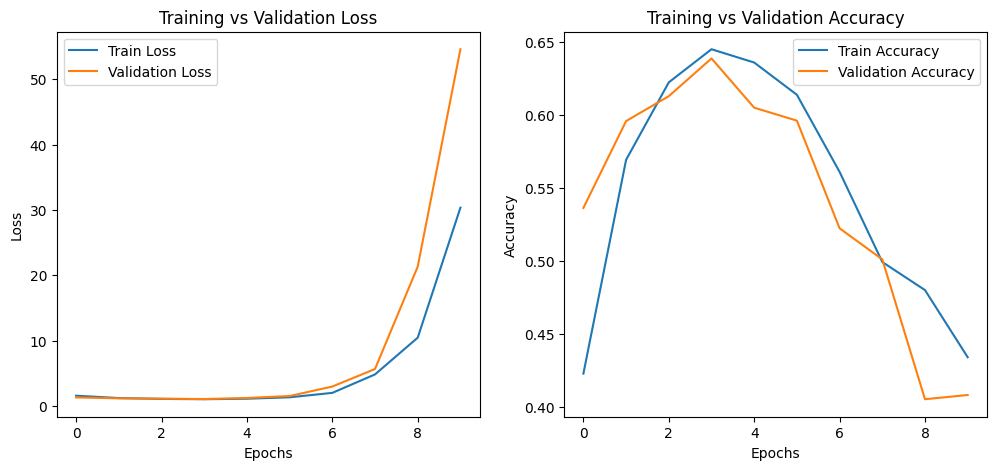

In [6]:
# Create a new figure with a specific size for better visualization
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, first plot)
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.xlabel('Epochs')  # Label x-axis as 'Epochs'
plt.ylabel('Loss')  # Label y-axis as 'Loss'
plt.legend()  # Display legend
plt.title('Training vs Validation Loss')  # Set plot title

# Plot training and validation accuracy
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, second plot)
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epochs')  # Label x-axis as 'Epochs'
plt.ylabel('Accuracy')  # Label y-axis as 'Accuracy'
plt.legend()  # Display legend
plt.title('Training vs Validation Accuracy')  # Set plot title

# Display the plots
plt.show()


## 🎯 Final Thoughts (Why This is Best for Apple M1 Pro)

- ✅ Fixed tensorflow_datasets Issue (No extra install needed).
- ✅ Optimized with float16 Mixed Precision (Speeds up GPU).
- ✅ Uses TensorFlow Dataset API (tf.data) for faster loading.
- ✅ Runs Efficiently on Apple Metal GPU (M1 Pro).